In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from scipy import signal, ndimage
%run plot_in_logs

##### Experimental data

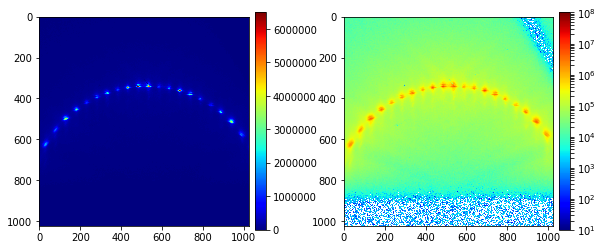

In [2]:
data = np.loadtxt("grating.txt.gz")
plot_in_logs(data)

#### Kernels

In [3]:
def coords(width, height):
    x = np.linspace(0, width, num=width) - width/2.0
    y = np.linspace(0, height, num=height) - height/2.0
    return np.meshgrid(x, y)

In [4]:
def kernels(r, sigma):
    x, y = coords(100, 100)
    rr = x**2 + y**2
    peak_kernel = np.exp(-0.5*rr/sigma**2)
    bkg_kernel = np.exp(-0.5 * (np.sqrt(rr)-r)**2 / sigma**2)
    peak_kernel /= peak_kernel.sum()
    bkg_kernel /= bkg_kernel.sum()
    return peak_kernel, bkg_kernel

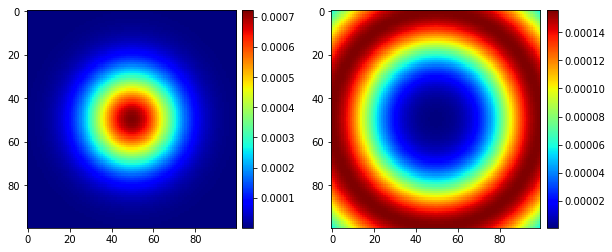

In [5]:
peak_kernel, bg_kernel = kernels(50, 15)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
im1 = ax1.imshow(peak_kernel, aspect='auto')
cb = plt.colorbar(im1, ax=ax1, pad=0.025)
im2 = ax2.imshow(bg_kernel, aspect='auto')
cb = plt.colorbar(im2, ax=ax2, pad=0.025)

#### Local mean background

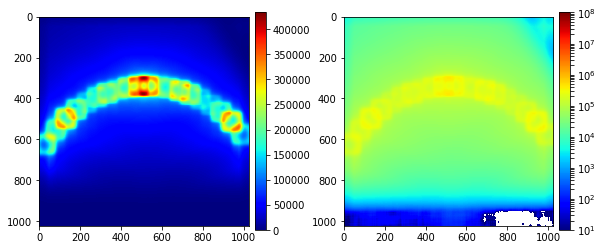

In [6]:
local_mean_background = signal.convolve2d(data, bg_kernel, mode="same")
plot_in_logs(local_mean_background)

#### Local mean background (corrected)

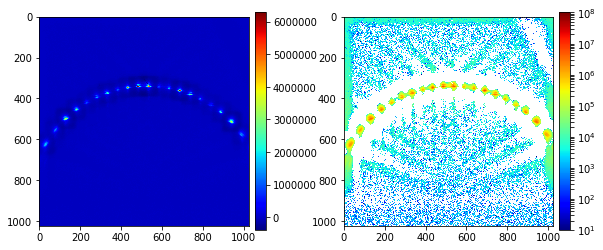

In [7]:
background_corrected = data - local_mean_background
plot_in_logs(background_corrected)

#### Local background variance

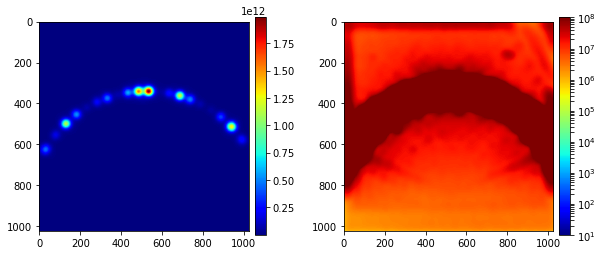

In [8]:
local_background_variance = signal.convolve2d(background_corrected**2, peak_kernel, mode="same")
plot_in_logs(local_background_variance)

#### Local deviation

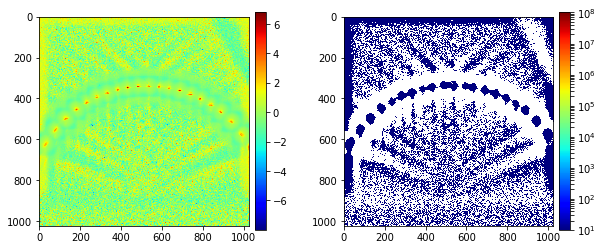

In [9]:
local_deviation = background_corrected / np.sqrt(local_background_variance)
plot_in_logs(local_deviation)

#### Smoothed local deviation

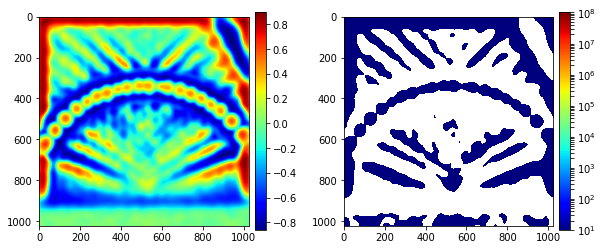

In [10]:
smoothed_local_deviation = signal.convolve2d(background_corrected, peak_kernel, mode="same") / np.sqrt(local_background_variance)
plot_in_logs(smoothed_local_deviation)

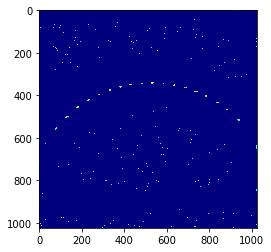

In [12]:
ths = np.copy(local_deviation)
ths[ths<2.5] = 0.0
f = plt.imshow(ths)

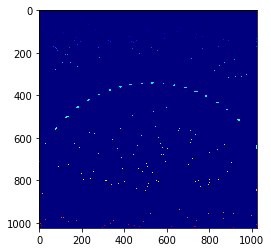

In [13]:
labeled_image, number_of_objects = ndimage.label(ths)
plt.imshow(labeled_image)

In [14]:
peak_slices = ndimage.find_objects(labeled_image)

In [15]:
def centroid(data):
    h,w = np.shape(data)   
    x = np.arange(0,w)
    y = np.arange(0,h)

    X,Y = np.meshgrid(x,y)

    cx = np.sum(X*data)/np.sum(data)
    cy = np.sum(Y*data)/np.sum(data)

    return cx,cy

centroids = []

In [19]:
for peak_slice in peak_slices:
    dy,dx  = peak_slice
    x,y = dx.start, dy.start
    cx,cy = centroid(ths[peak_slice])
    centroids.append((x+cx,y+cy))

In [ ]:
plt.imshow(data)

# for x,y in centroids:
#     plt.plot(x,y,'kx',ms=10)